In [1]:
import os

In [130]:
os.chdir("/Users/Arunabh/Desktop/")

In [131]:
import pandas as pd

In [132]:
df = pd.read_excel("KNN.xlsx")

In [10]:
df.head()

,Age,Weight,Salary,smoking
0,24,87,80.0,S
1,25,67,70.0,S
2,27,55,75.0,NS
3,29,84,88.0,NS
4,32,77,NaN,NaN


In [11]:
df.drop(["smoking"],1, inplace = True)

In [12]:
df.head()

,Age,Weight,Salary
0,24,87,80.0
1,25,67,70.0
2,27,55,75.0
3,29,84,88.0
4,32,77,NaN


In [13]:
import matplotlib.pyplot as plt


Text(0,0.5,'Weight')

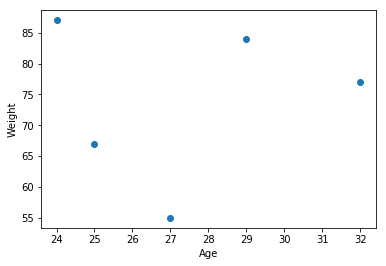

In [15]:
plt.scatter(df["Age"], df["Weight"])
plt.xlabel("Age")
plt.ylabel("Weight")

In [16]:
from scipy.spatial.distance import euclidean

In [41]:
df.head()

,Age,Weight,Salary
0,24,87,80.0
1,25,67,70.0
2,27,55,75.0
3,29,84,88.0
4,32,77,NaN


In [44]:
euclidean(df.iloc[0][:2], df.iloc[1][:2])

20.024984394500787

In [47]:
points =[]
for x in range(df.shape[0]):
    point = df.iloc[x][:2]
    points.append(point)

In [52]:
euclidean(points[0], points[1])

20.024984394500787

In [53]:
distances = []
for x in range(df.shape[0]):
    distance = euclidean(points[4], points[x])
    distances.append(distance)

In [55]:
df["distances"] = distances

In [56]:
df.head()

,Age,Weight,Salary,distances
0,24,87,80.0,12.806248
1,25,67,70.0,12.206556
2,27,55,75.0,22.561028
3,29,84,88.0,7.615773
4,32,77,NaN,0.000000


In [58]:
df = df.sort_values(["distances"])

In [59]:
df

,Age,Weight,Salary,distances
4,32,77,NaN,0.000000
3,29,84,88.0,7.615773
1,25,67,70.0,12.206556
0,24,87,80.0,12.806248
2,27,55,75.0,22.561028


In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [103]:
knn_regression = KNeighborsRegressor(n_neighbors=4)

In [104]:
df.head()

,Age,Weight,Salary,smoking
0,24,87,80.0,S
1,25,67,70.0,S
2,27,55,75.0,NS
3,29,84,88.0,NS
4,32,77,NaN,NaN


In [105]:
X_test = df.iloc[4][:2]

In [106]:
X_test

Age       32
Weight    77
Name: 4, dtype: object

In [107]:
train = df.iloc[:4]

In [108]:
train = train.drop(["smoking"],1)

In [109]:
train

,Age,Weight,Salary
0,24,87,80.0
1,25,67,70.0
2,27,55,75.0
3,29,84,88.0


In [110]:
X_train = train.drop(["Salary"],1)

In [111]:
X_train

,Age,Weight
0,24,87
1,25,67
2,27,55
3,29,84


In [112]:
y_train = train["Salary"]

In [113]:
y_train

0    80.0
1    70.0
2    75.0
3    88.0
Name: Salary, dtype: float64

In [114]:
y_test = 110

In [115]:
X_train

,Age,Weight
0,24,87
1,25,67
2,27,55
3,29,84


In [116]:
X_test = pd.DataFrame(X_test).T

In [117]:
y_test

110

In [118]:
knn_regression.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [125]:
y_pred= knn_regression.predict(X_test).tolist()[0]

In [126]:
from sklearn.metrics import mean_squared_error, mean_squared_error
import numpy as np

In [129]:
mean_squared_error([110],[79.3])

942.4900000000001

In [133]:
df.head()

,Age,Weight,Salary,smoking
0,24,87,80.0,S
1,25,67,70.0,S
2,27,55,75.0,NS
3,29,84,88.0,NS
4,32,77,NaN,NaN


In [134]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
X_test = pd.DataFrame(df.iloc[4][:2]).T

In [140]:
X_test

,Age,Weight
4,32,77


In [143]:
X_train = df.iloc[:4]

In [145]:
X_train.drop(["smoking", "Salary"],1, inplace = True)

/Users/Arunabh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [149]:
y_train = df["smoking"][:4]

In [150]:
y_train

0     S
1     S
2    NS
3    NS
Name: smoking, dtype: object

In [151]:
X_test

,Age,Weight
4,32,77


In [152]:
X_train

,Age,Weight
0,24,87
1,25,67
2,27,55
3,29,84


In [156]:
y_test = "S"
y_test = pd.Series(y_test)

In [155]:
y_train

0     S
1     S
2    NS
3    NS
Name: smoking, dtype: object

In [157]:
y_test

0    S
dtype: object

In [175]:
knn_classifer = KNeighborsClassifier(n_neighbors=3, metric = "euclidean")

In [176]:
knn_classifer.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [177]:
y_pred = knn_classifer.predict(X_test)

In [178]:
y_pred

array(['S'], dtype=object)